# ِDownloading dataset from Kaggle

In [ ]:
import opendatasets as od
  
od.download(
    "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset")

# import packages

In [26]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import random
import pathlib
import torchvision
from torch import nn
from torch.utils.data import Dataset
from random import randint
from tqdm import tqdm
from PIL import Image
import matplotlib.image as img
from torch.utils.data import DataLoader
import torch.nn.functional as tnf
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, utils, datasets, models

## Import Data

In [2]:
data_path = './data/'
data_dir = pathlib.Path(data_path)

In [51]:
happy = list(data_dir.glob('happy/*'))
sad = list(data_dir.glob('sad/*'))
total_list= happy + sad
total_list

[WindowsPath('data/happy/05-12-21-happy-people.jpg'),
 WindowsPath('data/happy/07-120104-happy_people_are_not_nice_people.jpg'),
 WindowsPath('data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'),
 WindowsPath('data/happy/11-Habits-of-Truly-Happy-People.jpg'),
 WindowsPath('data/happy/154006829.jpg'),
 WindowsPath('data/happy/170404-happy-workers-feature.jpg'),
 WindowsPath('data/happy/1902539.jpg'),
 WindowsPath('data/happy/1902540.jpg'),
 WindowsPath('data/happy/1902587.jpg'),
 WindowsPath('data/happy/1920px-face-smile.svg_.png.jpg'),
 WindowsPath('data/happy/1HEoLBLidT2u4mhJ0oiDgig.png'),
 WindowsPath('data/happy/227-2271622_happy-people-business-team-celebrating-png.png'),
 WindowsPath('data/happy/60632274._UY200_.jpg'),
 WindowsPath('data/happy/7-Habits-of-Happy-People-image.jpeg'),
 WindowsPath('data/happy/7-principles-of-successful-and-happy-people.png'),
 WindowsPath('data/happy/7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg'),
 WindowsPath('data/happy/8cxKy5g9i.j

In [53]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)

model_dataset = datasets.ImageFolder(data_dir, transform=data_transform) 

image, label = model_dataset[0]
print(f"Image Size: {image.shape}")
print(f"Label: {label}")
print(image)

Image Size: torch.Size([3, 880, 1400])
Label: 0
tensor([[[0.8510, 0.8510, 0.8510,  ..., 0.9412, 0.9412, 0.9412],
         [0.8510, 0.8510, 0.8510,  ..., 0.9412, 0.9412, 0.9412],
         [0.8510, 0.8510, 0.8510,  ..., 0.9412, 0.9412, 0.9412],
         ...,
         [0.3294, 0.3608, 0.4000,  ..., 0.7098, 0.7098, 0.7098],
         [0.3490, 0.3804, 0.4196,  ..., 0.7098, 0.7098, 0.7098],
         [0.3373, 0.3765, 0.4235,  ..., 0.7098, 0.7098, 0.7098]],

        [[0.8431, 0.8431, 0.8431,  ..., 0.9333, 0.9333, 0.9333],
         [0.8431, 0.8431, 0.8431,  ..., 0.9333, 0.9333, 0.9333],
         [0.8431, 0.8431, 0.8431,  ..., 0.9333, 0.9333, 0.9333],
         ...,
         [0.5137, 0.5451, 0.5804,  ..., 0.7412, 0.7412, 0.7412],
         [0.5333, 0.5647, 0.6000,  ..., 0.7412, 0.7412, 0.7412],
         [0.5216, 0.5608, 0.6039,  ..., 0.7412, 0.7412, 0.7412]],

        [[0.8471, 0.8471, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8471, 0.8471, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [

In [54]:
data_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((100,100)),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]
        ),
    ]
)
BATCH_SIZE=256

model_dataset = datasets.ImageFolder(data_dir, transform=data_transform) 
train_count = int(0.7 * len(total_list)) 
valid_count = int(0.2 * len(total_list))
test_count = len(total_list) - train_count - valid_count
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(model_dataset, (train_count, valid_count, test_count))
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
valid_dataset_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True) 
test_dataset_loader  = torch.utils.data.DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
dataloaders = {'train': train_dataset_loader, 'val': valid_dataset_loader, 'test': test_dataset_loader}


c:\Users\srika\anaconda3\envs\gpuone\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


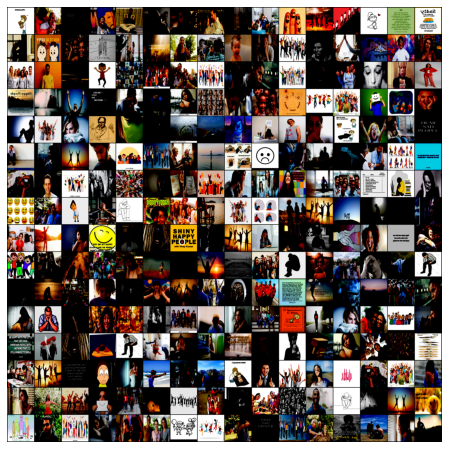

In [55]:
from torchvision.utils import make_grid
for item in train_dataset_loader:
    plt.figure(figsize=(16, 8))
    image, _ = item
    plt.imshow(make_grid(image, nrow=16).permute(1, 2, 0))
    plt.axis("off")
    plt.show()
    break

# Build the CNN Model:

In [56]:
class CustomizedConvNet(nn.Module):
    def __init__(self,number_of_classes):
        super().__init__() #Inheritance
        
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=12,padding=1,kernel_size=3)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=12,out_channels=20,padding=1,kernel_size=3)
        self.bn2=nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=20,out_channels=32,padding=1,kernel_size=3)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        

        self.fc1=nn.Linear(32*25*25, 5)

    
    def forward(self, Input):
        
        output=self.conv1(Input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool1(output)
        
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
        
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=self.pool3(output)
    
        
        output = torch.flatten(output, 1)
        output = output.view(-1,32*25*25)
        output=self.fc1(output)

        
        return output

In [65]:
model = CustomizedConvNet(5)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
model = model.to(device)
model

CustomizedConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20000, out_features=5, bias=True)
)

In [66]:
def accuracy(pred, label):
    _, out = torch.max(pred, dim=1)
    return torch.tensor(torch.sum(out == label).item()/len(pred))

def validation_step(valid_dl, model, loss_fn):
    for image, label in valid_dl:
        out = model(image)
        loss = loss_fn(out, label)
        acc = accuracy(out, label)
        return {"val_loss": loss, "val_acc": acc}
    
def fit_to_model(train_dl, valid_dl, epochs, optimizer, loss_fn, model):
    history = []
    for epoch in range(epochs):
        for image, label in train_dl:
            out = model(image)
            loss = loss_fn(out, label)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            
        val = validation_step(valid_dl, model, loss_fn)
        print(f"Epoch [{epoch}/{epochs}] => loss: {loss}, val_loss: {val['val_loss']}, val_acc: {val['val_acc']}")
        history.append({"loss": loss, 
                        "val_loss": val['val_loss'], 
                        "val_acc": val['val_acc']
                       })
    return history
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for x in self.dl:
            yield to_device(x, self.device)

In [67]:
train_dataset_loader= DeviceDataLoader(train_dataset_loader, device)
valid_dataset_loader = DeviceDataLoader(valid_dataset_loader, device)

Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 5

In [68]:
history = fit_to_model(train_dataset_loader, valid_dataset_loader, epochs, optimizer, Loss, model)

Epoch [0/5] => loss: 0.7048081755638123, val_loss: 0.7151138782501221, val_acc: 0.5390625
Epoch [1/5] => loss: 0.6995370388031006, val_loss: 0.7284677028656006, val_acc: 0.51953125
Epoch [2/5] => loss: 0.7025877237319946, val_loss: 0.706342339515686, val_acc: 0.60546875
Epoch [3/5] => loss: 0.6734549403190613, val_loss: 0.6586354374885559, val_acc: 0.60546875
Epoch [4/5] => loss: 0.6589555740356445, val_loss: 0.679395318031311, val_acc: 0.6484375


In [96]:
loss = []
val_loss = []
val_acc = []
for material in history :
    loss.append(material['loss'])
    val_loss.append(material['val_loss'])
    val_acc.append(material['val_acc'])

In [115]:
import re
def get_float(data):
    data = re.findall(r'\d+\.?\d*', str(data))[0]
    return float(data)

In [122]:
loss_data = []
for i in range(len(loss)):
    data = get_float(loss[i])
    loss_data.append(data)

val_loss_data = []
for i in range(len(val_loss)):
    data = get_float(val_loss[i])
    val_loss_data.append(data)

val_acc_data = []
for i in range(len(val_acc)):
    data = get_float(val_acc[i])
    val_acc_data.append(data)

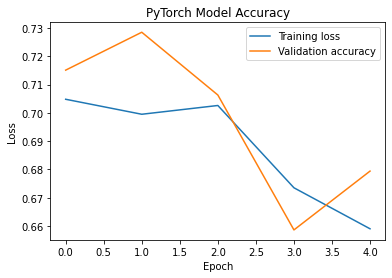

In [127]:
import matplotlib.pyplot as plt

plt.plot(loss_data, label='Training loss')
plt.plot(val_loss_data, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('PyTorch Model Accuracy')
plt.legend()
plt.show()


In [ ]:
with torch.no_grad():
    for img, label in test_dataset_loader:
        imgs = img[10]
        labels = label[10]
        print(plt.imshow(imgs))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


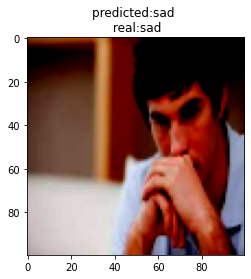

In [133]:
model = model.cpu()
with torch.no_grad():
    for img, label in test_dataset_loader:
        imgs = img[11]
        labels = label[11]
        output_model = imgs.unsqueeze(0)
        output_model = model(output_model)
        index = output_model.argmax()
        imgs = torch.permute(imgs,(1,2,0))
        plt.imshow(imgs)
        plt.title(f"predicted:{ model_dataset.classes[index]} \n real:{ model_dataset.classes[labels]}")
        break

In [72]:
PATH = "./models/image_classification_emotions.pth"

In [70]:
torch.save(model.state_dict(), PATH)

In [73]:
model.load_state_dict(torch.load(PATH))
model.eval()

CustomizedConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20000, out_features=5, bias=True)
)